## Introduction

Key points
- pandas is a powerful tool to process, manipulate and analyse data in Python.
- This guide is how I have used pandas, and it is **not** an exhaustive guide by any means. 


Useful Resources
- [https://pandas.pydata.org/](https://pandas.pydata.org/)
- Or just Google, really.

In [1]:
import pandas as pd

# Additional Notes:
# 1) "as" renames the package/object into something convenient to type. 

--------------------------

## Read Data

Key ponts:

- pandas can read data from many media: Excel workbooks, CSV files, JSON and SQL just to name a few.
    - To read Excel workbooks: `pd.read_excel()`
    - To read CSV files: `pd.read_csv()`
- Dataframes can also be built from scratch, from other datatypes (lists, dictionaries, etc) using `pd.DataFrame()`.
- The method will return dataframe object. A dataframe is a tabular data structure, like a spreadsheet.
    - Each *row* of a dataframe represents a record; each record has an index.
    - Each *column* of a dataframe is a parameter of the record.
    - *Note:* pandas is an object, so is a dataframe. Both have their associated methods. It is perfectly normal to be confused by the two.
- There are many arguments to the pandas methods. It is not possible to memorise them all. 
    - Use `help()` in the notebook if there is a need to, or refer (Google) the documentation.

In [2]:
filename = "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"

In [3]:
# Reading the data
df = pd.read_csv(filename)

# Additional notes:
# 1) Like "pd", "df" is a unofficial shortname for dataframe. However it is always good to give meaningful names to a
# dataframe, like naming variables.

#### About the Data

The data is the prices of the resale HDB flats based on registration date from Jan 2017 to date (as of 23 Apr 2022). It can be downloaded from [data.gov.sg]("https://data.gov.sg/dataset/resale-flat-prices?resource_id=f1765b54-a209-4718-8d38-a39237f502b3"), which is an excellent resource for data.

---------------------

## Exploring the Dataframe

Start exploring by simply looking at it. Look out for:
- what are the fields/columns
- what are the types of the data.
- missing data
- outliers

Use the following methods to help with exploring data:
- To view the first *N* rows of the data, use `.head(N)`
- To see a summary of the type of data and to quickly spot missing data, use `.info()`
- To summarise numeric columns of the dataframe, use `.describe()`

It is also possible to `pivot` the dataframe or create a `pivot_table` using pandas to summarise the data.

In [4]:
# To view the first 7 rows of data
df.head(7)

# Additional notes:
# 1) The method shows the first 5 rows of the data by default.
# 2) The dataframe displayed may be truncated if there are too many columns (not in this case). There is a way to show
# all the columns, but it is beyond the scope of this guide.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0


In [5]:
# Using .info on the dataframe
df.info()

# Additional notes:
# 1) Non-null count will infer how much missing data exists in the data.
# 2) This data is about 11MB, it is considered large for a CSV file.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124926 entries, 0 to 124925
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                124926 non-null  object 
 1   town                 124926 non-null  object 
 2   flat_type            124926 non-null  object 
 3   block                124926 non-null  object 
 4   street_name          124926 non-null  object 
 5   storey_range         124926 non-null  object 
 6   floor_area_sqm       124926 non-null  float64
 7   flat_model           124926 non-null  object 
 8   lease_commence_date  124926 non-null  int64  
 9   remaining_lease      124926 non-null  object 
 10  resale_price         124926 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.5+ MB


In [6]:
# Summary statistics of the dataframe
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,124926.000000,124926.000000,1.249260e+05
mean,97.809400,1995.187663,4.646190e+05
std,24.107801,13.507477,1.606454e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.480000e+05
50%,94.000000,1996.000000,4.340000e+05
75%,113.000000,2005.000000,5.480000e+05
max,249.000000,2019.000000,1.388889e+06


In [7]:
# Creating a pivot table
pd.pivot_table(df, values='resale_price', aggfunc='mean', columns=['month', 'town'])

# Additional notes:
# 1) .pivot_table() is a pandas method.

month               2017-01                                          \
town             ANG MO KIO     BEDOK         BISHAN    BUKIT BATOK   
resale_price  413971.214286  408598.4  604892.181818  373450.808511   

month                                                                  \
town            BUKIT MERAH  BUKIT PANJANG BUKIT TIMAH   CENTRAL AREA   
resale_price  512267.857143  408351.111111    812296.0  594583.333333   

month                                       ...        2022-04             \
town          CHOA CHU KANG       CLEMENTI  ...      PASIR RIS    PUNGGOL   
resale_price  392424.727273  420814.285714  ...  598060.714286  566616.25   

month                                                                \
town             QUEENSTOWN SEMBAWANG       SENGKANG      SERANGOON   
resale_price  676964.129032  523744.4  540186.048951  567551.407407   

month                                                                     
town               TAMPINES      TOA PAYOH      WOODLANDS         YISHUN  
resale_price  549186.290909  565242.536585  512129.227723  491803.140496  

[1 rows x 1662 columns]

-------------------------------

## Slicing, Dicing and Filtering

Key points:
- In practice, only a subset of the dataframe is used most of the time. To select columns use the slicing syntax (as with lists): `df[<list of column names>]`
    - Save the subset of the dataframe as a new instance by using `.copy()` to copy the selected subset.
- To reduce the dataframe by filtering, use the following syntax `df[<some condition>]`
    - We can further reduce the dataframe by selecting columns using `df[<some condition>][<list of column names]`
- To select a range of rows of the dataframe, use `df.iloc[<range of rows>, <range of columns>]`

In [8]:
# Selecting a column from a dataframe
df['town']

0         ANG MO KIO
1         ANG MO KIO
2         ANG MO KIO
3         ANG MO KIO
4         ANG MO KIO
             ...    
124921        YISHUN
124922        YISHUN
124923        YISHUN
124924        YISHUN
124925        YISHUN
Name: town, Length: 124926, dtype: object

In [9]:
# Selecting columns from a dataframe
df[['town', 'resale_price']]

,town,resale_price
0,ANG MO KIO,232000.0
1,ANG MO KIO,250000.0
2,ANG MO KIO,262000.0
3,ANG MO KIO,265000.0
4,ANG MO KIO,265000.0
...,...,...
124921,YISHUN,800000.0
124922,YISHUN,745000.0
124923,YISHUN,700000.0
124924,YISHUN,739388.0


In [10]:
# Filter the dataframe
df[df['town'] == "ANG MO KIO"]

# Additional notes:
# 1) Notice the index follows the original dataframe.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
123343,2022-04,ANG MO KIO,5 ROOM,501,ANG MO KIO AVE 5,04 TO 06,123.0,Improved,1981,57 years 10 months,602888.0
123344,2022-04,ANG MO KIO,5 ROOM,501,ANG MO KIO AVE 5,10 TO 12,121.0,Improved,1981,57 years 09 months,630000.0
123345,2022-04,ANG MO KIO,5 ROOM,455B,ANG MO KIO ST 44,07 TO 09,113.0,Improved,2018,94 years 11 months,940000.0
123346,2022-04,ANG MO KIO,EXECUTIVE,471,ANG MO KIO AVE 10,01 TO 03,162.0,Adjoined flat,1979,56 years 03 months,880000.0


In [11]:
# Select columns from a filtered dataframe
df[df['town'] == "ANG MO KIO"][['street_name', 'lease_commence_date']]

,street_name,lease_commence_date
0,ANG MO KIO AVE 10,1979
1,ANG MO KIO AVE 4,1978
2,ANG MO KIO AVE 5,1980
3,ANG MO KIO AVE 10,1980
4,ANG MO KIO AVE 5,1980
...,...,...
123343,ANG MO KIO AVE 5,1981
123344,ANG MO KIO AVE 5,1981
123345,ANG MO KIO ST 44,2018
123346,ANG MO KIO AVE 10,1979


In [12]:
# Row slicing using .iloc()
df.iloc[20:30]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
20,2017-01,ANG MO KIO,3 ROOM,119,ANG MO KIO AVE 3,07 TO 09,67.0,New Generation,1978,60 years 10 months,312000.0
21,2017-01,ANG MO KIO,3 ROOM,255,ANG MO KIO AVE 4,04 TO 06,73.0,New Generation,1977,59 years 06 months,321000.0
22,2017-01,ANG MO KIO,3 ROOM,432,ANG MO KIO AVE 10,10 TO 12,67.0,New Generation,1979,61 years,325000.0
23,2017-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1977,59 years 03 months,325000.0
24,2017-01,ANG MO KIO,3 ROOM,584,ANG MO KIO AVE 3,04 TO 06,67.0,New Generation,1979,61 years 05 months,328000.0
25,2017-01,ANG MO KIO,3 ROOM,118,ANG MO KIO AVE 4,07 TO 09,74.0,New Generation,1978,60 years 04 months,330000.0
26,2017-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,63 years,330000.0
27,2017-01,ANG MO KIO,3 ROOM,256,ANG MO KIO AVE 4,10 TO 12,73.0,New Generation,1977,59 years 06 months,335000.0
28,2017-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,63 years,338000.0
29,2017-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,10 TO 12,82.0,New Generation,1980,62 years,366000.0


#### Getting the dataframe's column names

It is useful to get the column names of the dataframe and keep it as a list. One of the applications is to filter out the date columns for processing (e.g. change in date formats) using list comprehension. The column names can be retrieved by using the `.columns` attribute.

In [13]:
# Getting the column names
df.columns

# Additional note:
# 1) The column "row" is also an index, and it is an iterable.

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [14]:
# Converting the column names into list
list(df.columns)

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'resale_price']

In [15]:
# Selecting required column names using list comprehension
[i for i in df.columns if 'date' in i.lower()]

['lease_commence_date']

------------------------

## Data Processing

Key points:
- Processing, or cleaning, data is an important process, and it takes up at least 60% of the time in a data workflow.
- Typical data processing steps include:
    - filling out missing values
    - normalising data
    - correcting typographical errors in data
    - adding derived data
    
#### Missing values

Missing values are common, but its treatment is important. Missing values can be either removed or deleted, or impute (filling missing values with a sensible guess, usually the median). My rule of thumb is: preserve the data as much as possible, and do not remove missing values unless it is certain that the impact of removal is small to the analysis - either they represent a very small set of the data, or because the records have just too many missing values.

In general, to remove missing values in a dataframe, use `df.dropna()`. To impute missing values, use `df.fillna()`. Use the *help* function or refer to the documentation to learn more about the two methods.

#### Adding new columns

More columns can be added by simply using the slicing notation.

```python
    df[<new column name>] = <some value or function>
```

#### Adding new columns using `.apply()`

The `.apply()` method can be applied on the whole dataframe (axis=1) or a specific column (use slicing) to derive data. In a subsequent operation, a "_year" and "_month" column will be derived from the "month" column of the dataframe.

*Note:* There is a similar `.applymap()` method.





In [16]:
# Using .apply()

# Operation - add the _year column
df['_year'] = df['month'].apply(lambda x: x.split('-')[0])

# Operation - add the _month column
df['_month'] = df['month'].apply(lambda x: x.split('-')[1])

In [17]:
# Inspect the dataframe - take note of the additional columns

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,_year,_month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,01
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,01
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,01
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,01
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,01


#### Important but beyond the scope of this discussion

There are additional data processing steps that are also important
- joining dataframes, using `df.join(<some other df>)`
    - joining concatenate dataframes, resulting in a taller dataframe. 
- merging dataframes, using `df.merge(<some other df)`
    - merging aligns dataframes based on common key or value, resulting in a wider dataframe.
- Refer to the documentation for more information about the methods.

-----------------------

## Plotting

Key points
- Visualising data is important in data analysis.
- Visualising data in Python from scratch can be painful, but it is made easier with pandas.
- But it is still painful in my opinion.
- Plotting can be done in pandas by using the `df.plot()` method.

#### Grouping data in a dataframe
Before plotting, the data needs to be aggregated. The method `.groupby()` is a preferred way to aggregated data for plotting. It works like a pivot table, only difference is the resultant data structure and shape that is more convenient for plotting.

#### Putting it all together
Let's plot a column chart of the average resale price of the HDB flats in ANG MO KIO in 2020.

<AxesSubplot:title={'center':'Avg HDB Resale Prices in Ang Mo Kio in 2020'}, xlabel='Month', ylabel='Avg Price'>

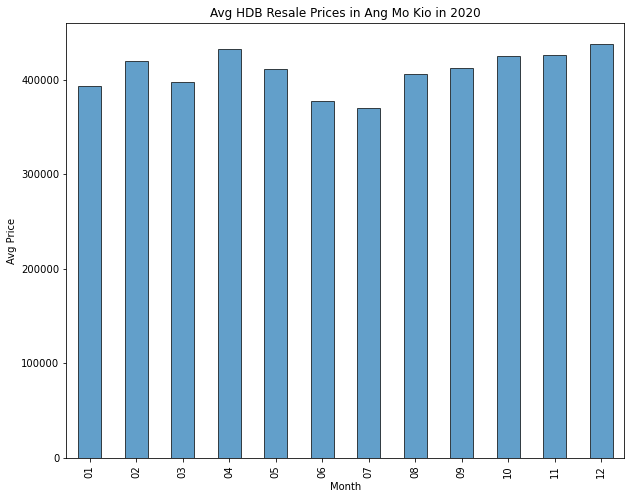

In [18]:
# Plotting with Pandas

# Define a new dataframe
df1_amk = df[(df['town'] == 'ANG MO KIO') & (df['_year'] == '2020')]['_month,resale_price'.split(',')].copy()

# Group the dataframe
df1_group = df1_amk.groupby(['_month'])['resale_price'].agg('mean')

# Plot
df1_group.plot(kind='bar', figsize=(10,8), 
               title='Avg HDB Resale Prices in Ang Mo Kio in 2020',
              ylabel = 'Avg Price', xlabel='Month',
              edgecolor='black', alpha=0.7)

# Additional notes:
# 1) Using .copy() is a good practice.
# 2) Note that the datatype for '_year' is string. 

-----------------

## IPython Widget

**Note** Interactive charts created in this section may not view properly in Github. 

One of the reasons why the preference in using notebook is the widgets availble in IPython. These widgets enable interactive plots for different selected slices of the data without going through iterative processes. Widgets can be used in simulations too.

First a function for the plotting will be created, then the `interact` module from the `ipywidgets` will be used to create the interactive chart.

For a simple example, let's re-create the previous chart but the *town* variable can be flexible.

In [19]:
from ipywidgets import interact

In [20]:
# Define a plotting function

def plot_chart(town):
    # Define a new dataframe
    df1_amk = df[(df['town'] == town) & (df['_year'] == '2020')]['_month,resale_price'.split(',')].copy()

    # Group the dataframe
    df1_group = df1_amk.groupby(['_month'])['resale_price'].agg('mean')
    
    # Plot
    df1_group.plot(kind='bar', figsize=(10,8), 
                   title=f'Avg HDB Resale Prices in {town} in 2020',
                  ylabel = 'Avg Price', xlabel='Month',
                  edgecolor='black', alpha=0.7)


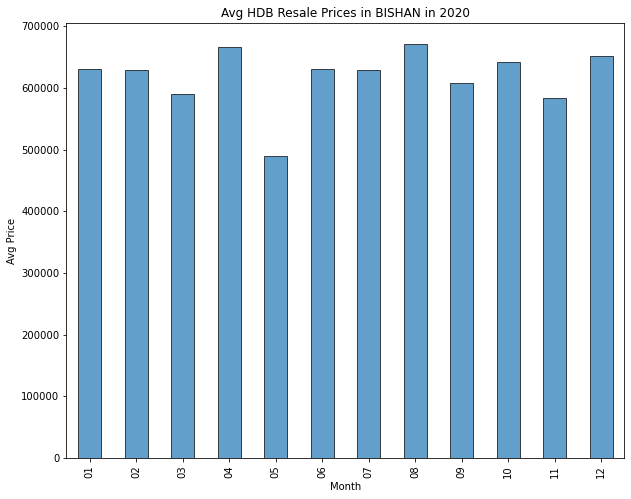

In [21]:
# Test the function - using town = 'BISHAN'
plot_chart('BISHAN')

In [22]:
# Additional step: Need to find the unique values in df['town']
unique_towns = sorted(list(set(df['town'])))

# Additional notes
# 1) Alternative 1: Use numpy's unique method; np.unique()
# 2) Alternative 2: Create an empty list and iteratively go through every value. Append only if a value is not present in
# the list.

In [23]:
# Use interact
interact(plot_chart, town=unique_towns)

interactive(children=(Dropdown(description='town', options=('ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'B…

<function __main__.plot_chart(town)>

**Alternatively:** a *decorator* can be used to to join the steps.

In [24]:
# Interactive plotting using decorator

@interact
def plot_chart2(town=unique_towns):
    # Define a new dataframe
    df1_amk = df[(df['town'] == town) & (df['_year'] == '2020')]['_month,resale_price'.split(',')].copy()

    # Group the dataframe
    df1_group = df1_amk.groupby(['_month'])['resale_price'].agg('mean')
    
    # Plot
    df1_group.plot(kind='bar', figsize=(10,8), 
                   title=f'Avg HDB Resale Prices in {town} in 2020',
                  ylabel = 'Avg Price', xlabel='Month',
                  edgecolor='black', alpha=0.7)
    

# Additional notes:
# 1) Defining unique_towns is still necessary; it is not replicated here because it has been defined previously.

interactive(children=(Dropdown(description='town', options=('ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'B…

#### Many combinations

There are many other slices that the data can be analysed, for example:
- *storey_range.* Units at a higher storey are generally more expensive. 
- *floor area.* Larger Units command a premium.


------------------------------------

# END 